# Imports

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from numpy.linalg import norm, inv
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import cv2
from outlier_detection_functions import cosine_similarity_scores, get_outliers
from visualization_dimensionality_red_functions import *

# Load files 

Load Features 

In [2]:
vgg_features = scipy.io.loadmat('girosmallveryslow2_vggfeatures.mat')['features']
clip = scipy.io.loadmat('girosmallveryslow2_clipfeatures.mat')["features"]


features = np.concatenate((vgg_features, clip), axis=0)

Load Video

In [3]:
video = cv2.VideoCapture('girosmallveryslow2.mp4')

# Data Visualization before outlier removal

Center features

In [6]:
features_centered, scaler = data_centering(features)

Plot singular values and check rank

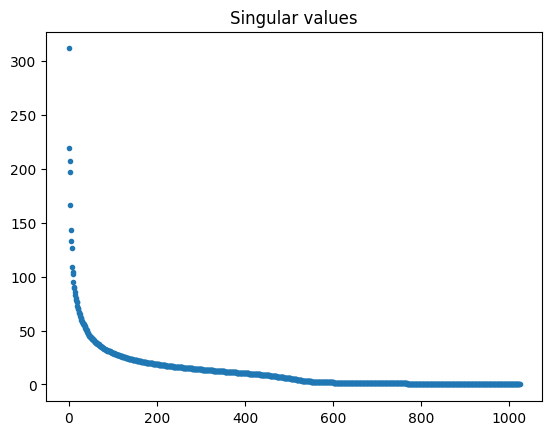

Rank: 160


In [7]:
svd = data_visualization(features_centered, method='svd', n_components=features_centered.shape[0])

# Calculate the rank of the features
cum_var = np.cumsum(svd.explained_variance_ratio_)
rank = np.where(cum_var > 0.90)[0][0] + 1
print('Rank:', rank)


PCA

In [8]:
embedding_PCA = data_visualization(features, method='pca', n_components=3)

T-SNE

In [9]:
embedding_TSNE = data_visualization(features, method='tsne', n_components=3, n_neighbors=15)

c:\Users\duart\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



UMAP

In [10]:
embedding_UMAP = data_visualization(features_centered, method='umap', n_components=3, n_neighbors=15)

# Outlier Removal

In [4]:
outliers_1 = get_outliers(cosine_similarity_scores(features, variance_percentage=0.95), threshold=0.97)
outliers_2 = get_outliers(cosine_similarity_scores(features, variance_percentage=0.90), threshold=0.94)

outliers = np.unique(np.concatenate((outliers_1, outliers_2), axis=0)) # ensemble of outliers
print('Number of outliers:', len(outliers))

features_w_outliers = np.delete(features, outliers, axis=1) # features without outliers

Number of outliers: 444


Outlier Visualization 

In [ ]:
visualization_w_video(outliers, video) # press 'q' to exit the video or any other key to change the frame

As it can be seen the method used did a good job removing a big part of the outliers(a.k.a. out of focus frames, ads, and so on), it most probably didn't remove all of them but still.

# Data Visualization after outlier removal

Centering data

In [11]:
features_cnt_w_outlier, scaler_w_outlier = data_centering(features_w_outliers)

Plot singular values and check rank

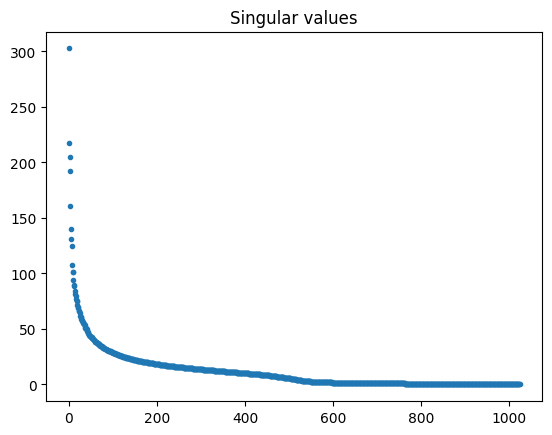

Rank: 158


In [12]:
svd = data_visualization(features_cnt_w_outlier, method='svd', n_components=features_cnt_w_outlier.shape[0])

# Calculate the rank of the features
cum_var = np.cumsum(svd.explained_variance_ratio_)
rank = np.where(cum_var > 0.90)[0][0] + 1
print('Rank:', rank)

The rank actually did go down, not by a lot, but it means we did manage to remove some "noise" of the data 

PCA

In [13]:
embedding_PCA = data_visualization(features_w_outliers, method='pca', n_components=3)

PCA visualization stay pretty much identical due too the linear nature of PCA and the big dimensionality reduction that is being made

T-SNE

In [5]:
embedding_TSNE = data_visualization(features_w_outliers, method='tsne', n_components=3, n_neighbors=15)

c:\Users\duart\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


TSNE visualization also stays similar, it also maintains its string like structure that are most likely represent sequences of frames that are similar 

UMAP

In [15]:
embedding_UMAP = data_visualization(features_w_outliers, method='umap', n_components=3, n_neighbors=15)

UMAPs' visualization changed a bit more relative to the other techniques used, though it still maintains its main structure with two big clusters of points, which leads us to presume that is likely for there to be two "shots" that contain a big part of the frames. Some of the isolated points could maybe represent some outliers that weren't detected in the method previously used, but it is difficult to conclude, once again because of the big dimensionality reduction that is being made

# Save outliers array

In [ ]:
# np.save('outliers.npy', outliers)